In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

In [10]:
# Load data
faces = fetch_lfw_people(min_faces_per_person=50).data
# what the fetch_lfw_people return is a matrix of K rows containing K faces
# each row is a row vector that has M*N matricies
faces = np.array(faces).T
print(np.shape(faces))

(2914, 820)


We have 820 images, each of which is 62 by 47 pixels.


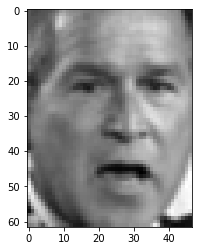

In [17]:
M = 62
N = 47
number_images = np.shape(faces)[1]
print("We have " + str(number_images) + " images, each of which is " + 
      str(M) + " by " + str(N)  + " pixels.")
plt.imshow(faces[:,0].reshape(M, N), cmap = plt.cm.gray)

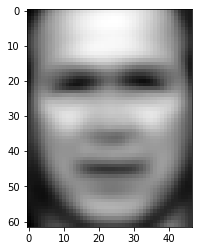

In [18]:
# mean image
transform = (1/number_images)*np.ones((number_images, 1))
muVectorized = faces @ transform
muImage = muVectorized.reshape(M, N)
plt.imshow(mean_face, cmap = plt.cm.gray)

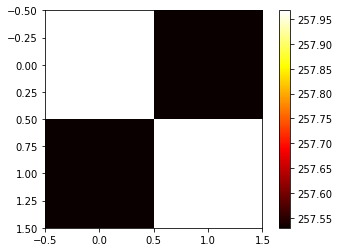

In [38]:
# top and bottom covariance across all images
transform = np.kron(np.ones((1,N)), np.identity(2))
transform = np.kron(transform, np.ones((1, int(M/2))))
transform = (2/(M*N))*transform
muTopBottomImgs = transform @ faces
muTopBottom = muTopBottomImgs @ ((1/number_images)*np.ones((number_images,1)))
muO = muTopBottomImgs - np.kron(np.ones((1,number_images)),muTopBottom )
cov = muO @ muO.T
cov = (1/(number_images-1)) * cov
plt.imshow(cov, cmap=plt.cm.hot)
plt.colorbar()